This assignment is based on Support Vector Machines.

**Instructions for this assignment:**


1.   Certain sections of code are missing are have being replaced by 'pass'. You need to replace 'pass' with your block of code by following the instructions provided.  




# Linear SVM

In [2]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # A module of scikit-learn library used for implementing SVM. SVC stands for Support Vector Classifier

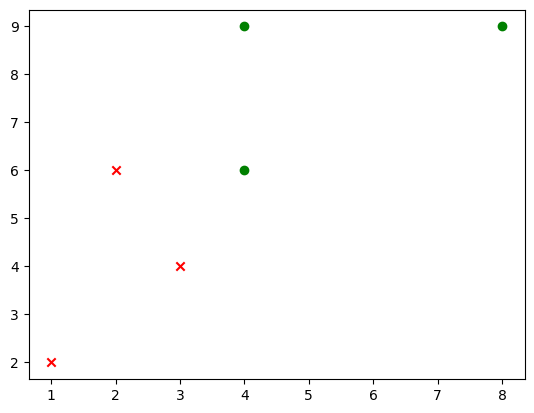

In [3]:
#Preparation of dataset

x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

**Task 1**: Read about kernel argument of SVC and replace kernal_used by the kernel required for linear SVM.

In [4]:

Classifier = SVC(gamma = 'auto', kernel = 'linear')
Classifier.fit(x, y)

SVC(gamma='auto', kernel='linear')

**Task 1:** Find the equation of boundary by using the parameters

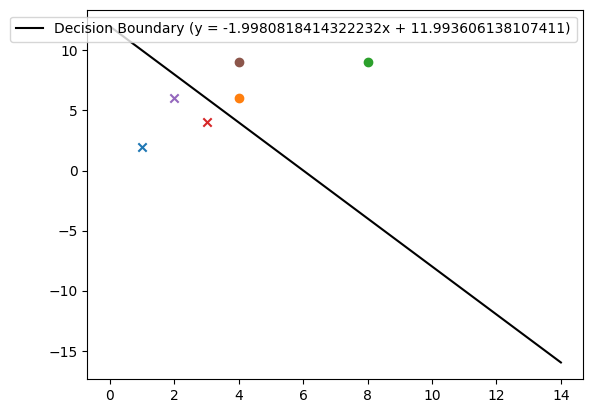

In [5]:
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0] / weight_matrix[1]
bias = -Classifier.intercept_[0] / weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias

# Equation of the decision boundary
equation = f"y = {slope}x + {bias}"

plt.plot(val, boundary, 'k', label=f"Decision Boundary ({equation})")

for i in range(y.shape[0]):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], marker='x')
    else:
        plt.scatter(x[i][0], x[i][1], marker='o')

plt.legend()
plt.show()

# Non- Linear SVM

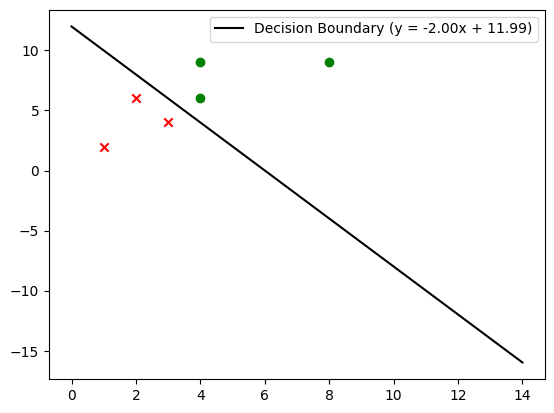

In [6]:
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0] / weight_matrix[1]
bias = -Classifier.intercept_[0] / weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias

# Equation of the decision boundary
equation = f"y = {slope:.2f}x + {bias:.2f}"

plt.plot(val, boundary, 'k', label=f"Decision Boundary ({equation})")

for i in range(y.shape[0]):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red', marker='x')
    else:
        plt.scatter(x[i][0], x[i][1], color='green', marker='o')

plt.legend()
plt.show()


**Answer the following questions** \\
Q: Is the above dataset linearly separable? yes

Q. How many classes are there in the above dataset 2

Q. How many features are used in the above dataset? 2

Q. What will be dimension of hyperplane used for this dataset?  1d line

#Splitting the Dataset
**Task**: Split the given dataset into training and testing data. The code snippet to illustrate the data has been given.

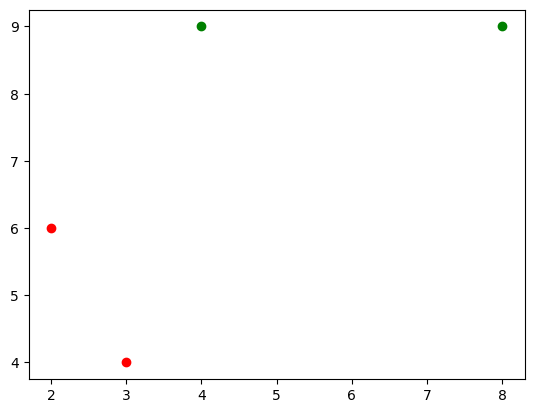

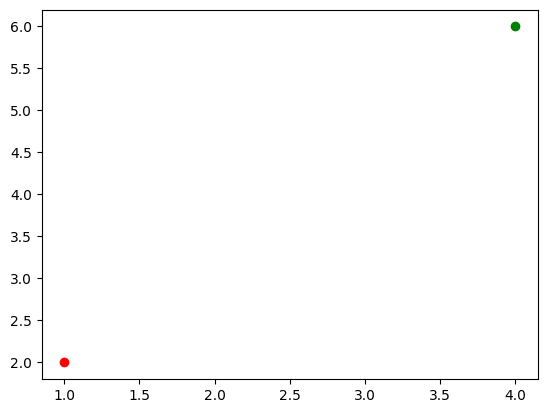

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for i in range (X_train.T[0].size):
  if(Y_train[i]==1):
    plt.scatter(X_train[i][0], X_train[i][1], color="green")
  else:
    plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.show()

for i in range (X_test.T[0].size):
  if(Y_test[i]==1):
    plt.scatter(X_test[i][0], X_test[i][1], color="green")
  else:
    plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.show()

# Non Linear Classifier
**Task 1**: Generate a classifier for the above dataset using suitable kernel function. Also, provide an explanation for your choice of kernel. \\
**Task 2**: Explain and illustrate, using plots, how the kernel used, enables the data to be classified using a SVC.

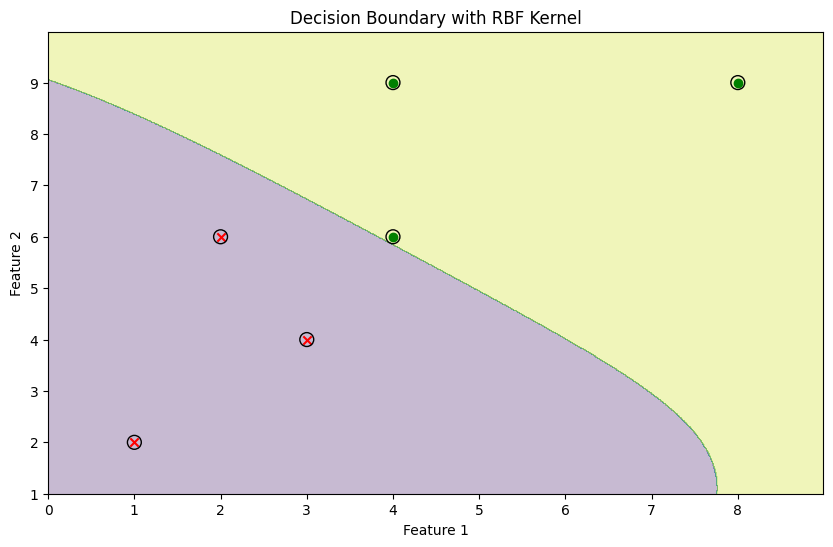

In [11]:
classifier = SVC(kernel='rbf', gamma='scale')  
classifier.fit(x, y)
def plot_decision_boundary(clf, X, y):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    for i in range(y.shape[0]):
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color='red', marker='x')
        else:
            plt.scatter(X[i][0], X[i][1], color='green', marker='o')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with RBF Kernel')
    plt.show()

plot_decision_boundary(classifier, x, y)